# Preliminary EDA for Recipe Recommendation System - dataset from Epicurious.com

# Preliminary EDA for Recipe Recommendation System - dataset from Epicurious.com

# Table of Contents
- [Preliminary EDA for Recipe Recommendation System - dataset from Epicurious.com](#preliminary-eda-for-recipe-recommendation-system---dataset-from-epicurious.com)
  - [Introduction](#introduction)
    - [Dataset](#dataset)
    - [Goals](#goals)
  - [EDA](#eda)
    - [Load the data](#load-the-data)
    - [Check for missing and duplicate values](#check-for-missing-and-duplicate-values)
      - [Drop rows with null values](#drop-rows-with-null-values)
    - [Distribution of data](#distribution-of-data)
  - [Findings](#findings)
  - [Concerns and Questions](#concerns-and-questions)
  - [Data Dictionary](#data-dictionary)
  - [Drop columns and create a cleaned dataframe](#drop-columns-and-create-a-cleaned-dataframe)


## Introduction

### Dataset

In this notebook, we will be conducting an EDA for the data set downloaded from https://www.kaggle.com/datasets/hugodarwood/epirecipes. (This has Id = 2 in my [Datasets Shortlist](https://docs.google.com/spreadsheets/d/1ldHpPRw_h2igZUgrDVV3-4N8vYuZXxyOC60sUJlbb7E/)))  

The downloaded folder contains 4 files:
- full_format_recipes.json
- recipe.py
- utils.py
- epi_r.csv

Kaggle.com has the following information on the dataset:  
*Over 20k recipes listed by recipe rating, nutritional information and assigned category (sparse).*  
*Use the 'full_format_recipes.json' file to interact with all recipe data, 'epi_r.csv' drops ingredients and directions in favour of sparse category dummies.*

### Goals

1. Find out whether the dataset contains the following things:
    1. Ingredient lists
    2. Calorie info / Nutrition info
    3. Serving size
    4. Ratings
    5. Recipe steps / instructions
    6. Quantity of each ingredient
2. See cleanliness of data in terms of missing values.
3. Check the distribution of relevant variables.
4. Create a data dictionary.

## EDA

### Load the data

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f"pandas version: {pd.__version__}"

'pandas version: 2.1.4'

In [3]:
# Read epi_r.csv into a DataFrame
#df_epi_r = pd.read_csv('../data/raw/epi_r.csv')
#df_epi_r.shape

epi_r has 20052 rows and 680 columns.

In [4]:
# Read full_format_recipes.json into a DataFrame
df_epi_json = pd.read_json('../data/raw/full_format_recipes.json')
df_epi_json.shape

(20130, 11)

epi_json has 20130 rows and 11 columns. Let's look at the columns.

In [5]:
df_epi_json.columns

Index(['directions', 'fat', 'date', 'categories', 'calories', 'desc',
       'protein', 'rating', 'title', 'ingredients', 'sodium'],
      dtype='object')

Columns:  
['directions', 'fat', 'date', 'categories', 'calories', 'desc', 'protein', 'rating', 'title', 'ingredients', 'sodium']

Columns of interest to us:  
['directions',  
'calories',  
'desc',  
'rating',  
'ingredients']

In [6]:
# Let's see some sample rows for epi_json
df_epi_json.sample(5)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
17076,[Preheat oven to 375°F. Stir 2 tablespoons but...,90.0,2004-08-20 04:00:00+00:00,"[Chicken, Garlic, Poultry, Roast, Dinner, Wint...",1283.0,None,99.0,4.375,Chili-Roasted Chicken with Roasted Garlic Gravy,"[4 tablespoons (1/2 stick) butter, melted, 4 t...",480.0
17406,[Pierce the eggplants in several places with a...,11.0,2004-08-20 04:00:00+00:00,"[Condiment/Spread, Appetizer, Broil, Vegetaria...",192.0,None,4.0,3.125,Eggplant Spread,"[two 1 1/2-pound eggplants, 1 medium onion, mi...",111.0
11504,[Peel the potatoes and cut them into 1-inch pi...,14.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Potato, Side, Vegetarian, Quick &...",389.0,(Mashed Potatoes with Cabbage),9.0,4.375,Colcannon,[1 1/4 pounds (about 2 large) russet (baking) ...,61.0
19689,"[Char chile over a gas flame, turning occasion...",NaN,2013-05-09 04:00:00+00:00,"[Bean, Cheese, Fry, Cinco de Mayo, Dinner, Lun...",NaN,The secret to this dish is the crunchy and cre...,NaN,4.375,Fried Avocado Tacos,"[1 poblano chile, 2 scallions, chopped, 1/2 cu...",NaN
13194,"[1. Put the blackberries, sugar, and 1 ounce o...",8.0,2007-08-16 19:08:25+00:00,"[Milk/Cream, Dairy, Egg, Breakfast, Dessert, K...",262.0,None,8.0,4.375,Crepes with Homemade Fruit Syrup,"[1 pint fresh blackberries, 1/2 cup sugar, 1 c...",79.0


**Note**
1. Contains calories.
2. Does NOT contain serving size.
3. Contains rating.
4. `ingredients` has:
    1. List of ingredients
    2. Quantity of each ingredient
    3. Measurement of each ingredient
5. `directions` contains the steps for the recipe.

In [7]:
# Let's look at one row in detail
df_epi_json.loc[0,:].values

array([list(['1. Place the stock, lentils, celery, carrot, thyme, and salt in a medium saucepan and bring to a boil. Reduce heat to low and simmer until the lentils are tender, about 30 minutes, depending on the lentils. (If they begin to dry out, add water as needed.) Remove and discard the thyme. Drain and transfer the mixture to a bowl; let cool.', '2. Fold in the tomato, apple, lemon juice, and olive oil. Season with the pepper.', '3. To assemble a wrap, place 1 lavash sheet on a clean work surface. Spread some of the lentil mixture on the end nearest you, leaving a 1-inch border. Top with several slices of turkey, then some of the lettuce. Roll up the lavash, slice crosswise, and serve. If using tortillas, spread the lentils in the center, top with the turkey and lettuce, and fold up the bottom, left side, and right side before rolling away from you.']),
       7.0, Timestamp('2006-09-01 04:00:00+0000', tz='UTC'),
       list(['Sandwich', 'Bean', 'Fruit', 'Tomato', 'turkey', 'Vege

In [8]:
# Let's look at the one-hot encoded sample from epi_r
#df_epi_r.sample(5)

In [9]:
#df_epi_r.columns.values

In [10]:
#"title" in df_epi_r.columns

In [11]:
#"rating" in df_epi_r.columns

In [12]:
#df_epi_r.rating.unique()

In [13]:
#df_epi_r.yogurt.unique() # we lose information about quantities in this one-hot encoded form

**Note**  
We lose information about ingredient measurements in this one-hot encoded form.

### Check for missing and duplicate values

Let's check for missing values in epi_json

In [14]:
df_epi_json.isna().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

Many of our columns of interest have null values. Let's see the percentage of missing values.

In [15]:
(df_epi_json.isna().sum()/df_epi_json.shape[0]*100.0).sort_values(ascending=False)

desc           32.960755
fat            20.973671
protein        20.869349
sodium         20.645802
calories       20.635867
rating          0.149031
directions      0.094386
date            0.094386
categories      0.094386
title           0.094386
ingredients     0.094386
dtype: float64

#### Drop rows with null values

Let's drop the rows with null values for `calories`, `rating`, `directions`,`title`, `ingredients` and see how many rows we are left with.

In [16]:
df_clean = df_epi_json.dropna(subset=['directions','calories','title','ingredients','rating'])

In [17]:
df_clean.isna().sum()

directions        0
fat              68
date              0
categories        0
calories          0
desc           5333
protein          47
rating            0
title             0
ingredients       0
sodium            2
dtype: int64

In [18]:
df_clean.shape

(15969, 11)

**Note**  
The number of rows dropped from 20130 to 15969 after removing null values.

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15969 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   15969 non-null  object             
 1   fat          15901 non-null  float64            
 2   date         15969 non-null  datetime64[ns, UTC]
 3   categories   15969 non-null  object             
 4   calories     15969 non-null  float64            
 5   desc         10636 non-null  object             
 6   protein      15922 non-null  float64            
 7   rating       15969 non-null  float64            
 8   title        15969 non-null  object             
 9   ingredients  15969 non-null  object             
 10  sodium       15967 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.5+ MB


### Distribution of data

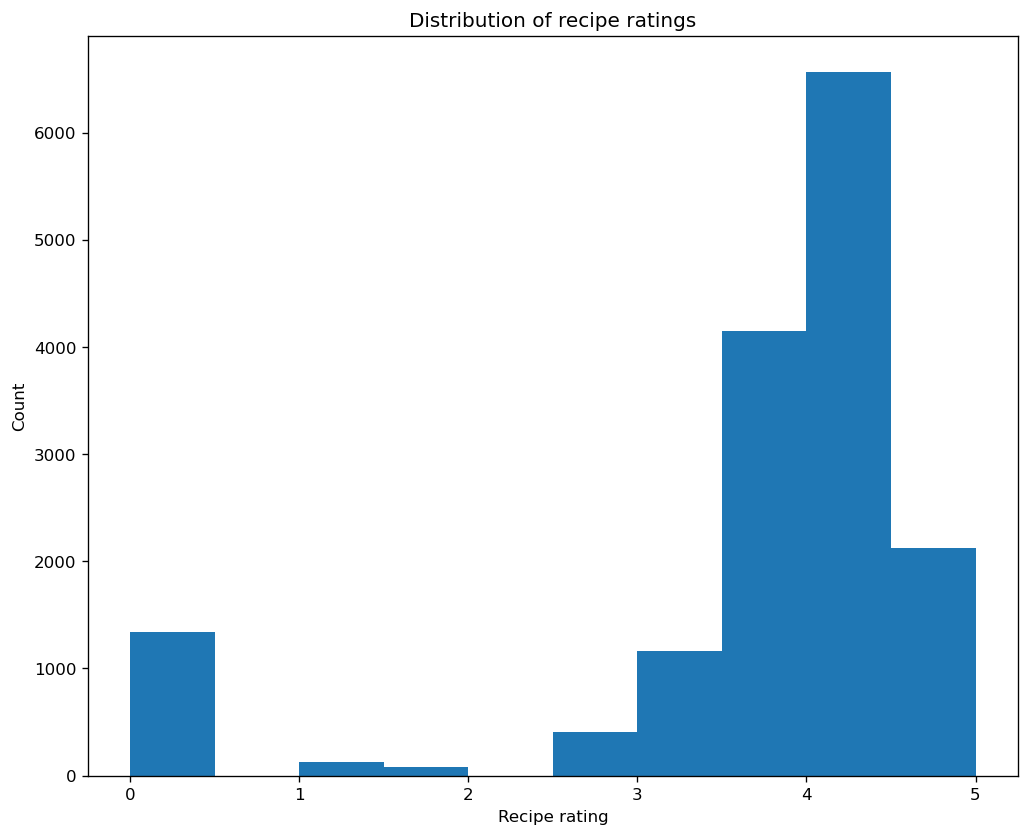

In [20]:
plt.figure(figsize=(10,8), dpi=120)
plt.hist(df_clean.rating)
plt.xlabel('Recipe rating')
plt.title('Distribution of recipe ratings')
plt.ylabel('Count')
plt.savefig("ratings.png")

In [21]:
df_clean.rating.unique()

array([2.5  , 4.375, 3.75 , 3.125, 1.875, 5.   , 0.   , 1.25 ])

**Note**  
`Rating` is a float with values ranging from 0 to 5. 

In [22]:
df_clean.rating.value_counts(normalize=True)

rating
4.375    0.411360
3.750    0.259816
5.000    0.133008
0.000    0.084038
3.125    0.073016
2.500    0.025800
1.250    0.007890
1.875    0.005072
Name: proportion, dtype: float64

**Note**  
41% has 4.37 rating  
25% has 3.75 rating  
13% has 5.0 rating  

54% of dataset has rating > 4.0.

In [23]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
fat,15901.0,346.240677,20435.516749,0.0,7.00,17.000,33.000,1722763.0
calories,15969.0,6310.443109,358663.690751,0.0,198.00,331.000,586.000,30111218.0
protein,15922.0,99.982665,3836.459371,0.0,3.00,8.000,27.000,236489.0
rating,15969.0,3.751096,1.298607,0.0,3.75,4.375,4.375,5.0
sodium,15967.0,6213.949208,332963.199777,0.0,80.00,294.000,711.000,27675110.0


## Findings


1. `ingredients` has:
    1. List of ingredients
    2. Quantity of each ingredient
    3. Measurement of each ingredient
2. `directions` contains the steps for the recipe.
3. We lose information about ingredient measurements in the one-hot encoded form of epi_r.csv.
4. The number of rows dropped from 20130 to 15969 after removing null values.
5. `Rating` is a float with values ranging from 0 to 5. 
6. 54% of dataset has rating > 4.0.
7. Summary

|                               |     |
|-------------------------------|-----|
| Ingredient lists              | Yes |
| Calorie info / Nutrition info | Yes |
| Serving size                  | No  |
| Ratings                       | Yes |
| Recipe steps / instructions   | Yes |
| Quantity of each ingredient   | Yes |

## Concerns and Questions

1. The License for the dataset says 'Unknown' on Kaggle. Is this an issue?
2. The size of the dataset seems small ~ 16000 rows.
3. 54% of the dataset has rating > 4.0.
4. One hot encoding lost ingredient amounts.
5. Dataset contains calories but not serving size.